## Testing for curvature 

This notebook shows how to test for spectral curvature in a source.  It also details how to reload data from a fermipy save file.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib
import numpy as np

In [2]:
from fermipy.gtanalysis import GTAnalysis

## Load the old anlaysis

This is the save file from where we left off.

In [3]:
gta = GTAnalysis.create('data/fit2_sed.npy')

2019-05-31 18:49:16 INFO    GTAnalysis.__init__(): 
--------------------------------------------------------------------------------
fermipy version 0.17.4 
ScienceTools version ScienceTools-11-04-00
2019-05-31 18:49:19 INFO    GTAnalysis.setup(): Running setup.
2019-05-31 18:49:19 INFO    GTBinnedAnalysis.setup(): Running setup for component 00
2019-05-31 18:49:19 INFO    GTBinnedAnalysis._select_data(): Skipping data selection.
2019-05-31 18:49:19 INFO    GTBinnedAnalysis._create_ltcube(): Skipping LT Cube.
2019-05-31 18:49:19 INFO    GTBinnedAnalysis._create_expcube(): Skipping gtexpcube.
the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
2019-05-31 18:49:19 INFO    GTBinnedAnalysis._create_srcmaps(): Skipping gtsrcmaps.
2019-05-31 18:49:19 INFO    GTBinnedAnalysis.setup(): Finished setup for component 00
2019-05-31 18:49:19 INFO    GTBinnedAnalysis.setup(): Running setup for component 01
2019-05-31 18:49:19 INFO    GTBinnedAnalysis._select_data(): Skipping data sel

In [4]:
gta.print_roi()

2019-05-31 18:53:33 INFO    GTAnalysis.print_roi(): 
name                SpatialModel   SpectrumType     offset        ts       npred
--------------------------------------------------------------------------------
FL8Y J1256.1-0547   PointSource    LogParabola       0.000  14198.13      7912.0
FL8Y J1258.7-0452   PointSource    PowerLaw          1.120      2.89        10.6
FL8Y J1249.3-0546   PointSource    PowerLaw          1.696      6.98       105.8
FL8Y J1304.4-0358   PointSource    PowerLaw          2.761      5.63       100.9
FL8Y J1243.9-0218   PointSource    PowerLaw          4.629     13.58        82.7
FL8Y J1315.9-0732   PointSource    PowerLaw          5.215     17.28        61.6
FL8Y J1234.7-0433   PointSource    PowerLaw          5.463      3.90        28.3
FL8Y J1256.2-1146   PointSource    PowerLaw          5.983     32.48       102.0
FL8Y J1322.3-0606   PointSource    PowerLaw          6.529      6.23        30.3
FL8Y J1233.7-0144   PointSource    PowerLaw          6.9

In [5]:
fit = gta.fit()

2019-05-31 18:53:39 INFO    GTAnalysis.fit(): Starting fit.
2019-05-31 18:53:39 INFO    GTAnalysis.fit(): Skipping fit.  No free parameters.


In [6]:
fit

{'config': {'covar': True,
  'init_lambda': 0.0001,
  'max_iter': 100,
  'min_fit_quality': 2,
  'optimizer': 'MINUIT',
  'reoptimize': False,
  'retries': 3,
  'tol': 0.001,
  'verbosity': 0},
 'correlation': None,
 'covariance': None,
 'dloglike': 0.0,
 'edm': 0.0,
 'errors': array([], dtype=float64),
 'fit_quality': 3,
 'fit_status': 0,
 'fit_success': True,
 'indices': array([], dtype=int64),
 'is_norm': array([], dtype=bool),
 'loglike': -146710.03606467778,
 'par_names': [],
 'src_names': [],
 'values': array([], dtype=float64)}

## Load the SED

We calculated the SED before.

In [7]:
c = np.load('data/fit2_sed.npy').flat[0]

In [9]:
E = np.array(c['sources']['FL8Y J1256.1-0547']['model_flux']['energies'])
dnde = np.array(c['sources']['FL8Y J1256.1-0547']['model_flux']['dnde'])
dnde_hi = np.array(c['sources']['FL8Y J1256.1-0547']['model_flux']['dnde_hi'])
dnde_lo = np.array(c['sources']['FL8Y J1256.1-0547']['model_flux']['dnde_lo'])

In [10]:
sed = np.load('data/fl8y_j1256.1-0547_sed.npy').flat[0]

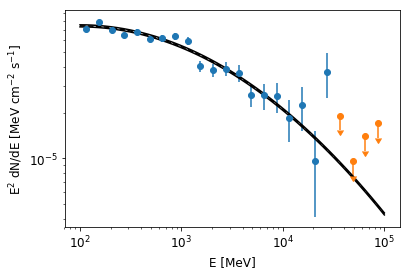

In [11]:
plt.loglog(E, (E**2)*dnde, 'k--')
plt.loglog(E, (E**2)*dnde_hi, 'k')
plt.loglog(E, (E**2)*dnde_lo, 'k')
plt.errorbar(sed['e_ctr'][:-4],
             sed['e2dnde'][:-4], 
             yerr=sed['e2dnde_err'][:-4], fmt ='o')
plt.errorbar(np.array(sed['e_ctr'][-4:]),
         sed['e2dnde_ul95'][-4:], yerr=0.2*sed['e2dnde_ul95'][-4:], 
             fmt='o', uplims=True)
plt.xlabel('E [MeV]')
plt.ylabel(r'E$^{2}$ dN/dE [MeV cm$^{-2}$ s$^{-1}$]')
plt.show()

In [12]:
src_logpar = gta.delete_source('FL8Y J1256.1-0547')

2019-05-31 18:54:47 INFO    GTAnalysis.delete_source(): Deleting source FL8Y J1256.1-0547


In [13]:
gta.add_source(src_logpar['name'],{ 'ra' : src_logpar['ra'], 'dec' : src_logpar['dec'],
                 'SpectrumType' : 'PowerLaw', 'Index' : 2.0,
                 'Scale' : 1000, 'Prefactor' : 1e-11,
                 'SpatialModel' : 'PointSource' })

2019-05-31 18:54:51 INFO    GTAnalysis.add_source(): Adding source FL8Y J1256.1-0547


In [14]:
gta.print_roi()

2019-05-31 18:55:34 INFO    GTAnalysis.print_roi(): 
name                SpatialModel   SpectrumType     offset        ts       npred
--------------------------------------------------------------------------------
FL8Y J1256.1-0547   PointSource    PowerLaw          0.000       nan      1203.7
FL8Y J1258.7-0452   PointSource    PowerLaw          1.120      2.89        10.6
FL8Y J1249.3-0546   PointSource    PowerLaw          1.696      6.98       105.8
FL8Y J1304.4-0358   PointSource    PowerLaw          2.761      5.63       100.9
FL8Y J1243.9-0218   PointSource    PowerLaw          4.629     13.58        82.7
FL8Y J1315.9-0732   PointSource    PowerLaw          5.215     17.28        61.6
FL8Y J1234.7-0433   PointSource    PowerLaw          5.463      3.90        28.3
FL8Y J1256.2-1146   PointSource    PowerLaw          5.983     32.48       102.0
FL8Y J1322.3-0606   PointSource    PowerLaw          6.529      6.23        30.3
FL8Y J1233.7-0144   PointSource    PowerLaw          6.9

In [15]:
gta.free_source('FL8Y J1256.1-0547', pars=['Prefactor','Index'])

2019-05-31 18:55:44 INFO    GTAnalysis.free_source(): Freeing parameters for FL8Y J1256.1-0547     : ['Index']


In [16]:
fit2 = gta.fit()

2019-05-31 18:55:45 INFO    GTAnalysis.fit(): Starting fit.
2019-05-31 18:55:47 INFO    GTAnalysis.fit(): Fit returned successfully. Quality:   3 Status:   0
2019-05-31 18:55:47 INFO    GTAnalysis.fit(): LogLike:  -146722.878 DeltaLogLike:     3295.883 


In [17]:
fit2

{'config': {'covar': True,
  'init_lambda': 0.0001,
  'max_iter': 100,
  'min_fit_quality': 2,
  'optimizer': 'MINUIT',
  'reoptimize': False,
  'retries': 3,
  'tol': 0.001,
  'verbosity': 0},
 'correlation': array([[ 1.        , -0.67691226],
        [-0.67691226,  1.        ]]),
 'covariance': array([[ 0.00992405, -0.00097631],
        [-0.00097631,  0.00020961]]),
 'dloglike': 3295.8832549688814,
 'edm': 2.13151019902105e-11,
 'errors': array([ 0.09961954,  0.01447805]),
 'fit_quality': 3,
 'fit_status': 0,
 'fit_success': True,
 'indices': array([36, 37]),
 'is_norm': array([ True, False], dtype=bool),
 'loglike': -146722.87795475972,
 'niter': 3,
 'par_names': ['Prefactor', 'Index'],
 'src_names': ['FL8Y J1256.1-0547', 'FL8Y J1256.1-0547'],
 'values': array([ 5.07505639,  2.25869935])}

In [18]:
gta.print_roi()

2019-05-31 18:55:52 INFO    GTAnalysis.print_roi(): 
name                SpatialModel   SpectrumType     offset        ts       npred
--------------------------------------------------------------------------------
FL8Y J1256.1-0547   PointSource    PowerLaw          0.000  16223.76      7931.0
FL8Y J1258.7-0452   PointSource    PowerLaw          1.120      2.89        10.6
FL8Y J1249.3-0546   PointSource    PowerLaw          1.696      6.98       105.8
FL8Y J1304.4-0358   PointSource    PowerLaw          2.761      5.63       100.9
FL8Y J1243.9-0218   PointSource    PowerLaw          4.629     13.58        82.7
FL8Y J1315.9-0732   PointSource    PowerLaw          5.215     17.28        61.6
FL8Y J1234.7-0433   PointSource    PowerLaw          5.463      3.90        28.3
FL8Y J1256.2-1146   PointSource    PowerLaw          5.983     32.48       102.0
FL8Y J1322.3-0606   PointSource    PowerLaw          6.529      6.23        30.3
FL8Y J1233.7-0144   PointSource    PowerLaw          6.9

In [19]:
source = gta.roi.get_source_by_name('FL8Y J1256.1-0547')

In [20]:
print source

Name           : FL8Y J1256.1-0547
Associations   : ['FL8Y J1256.1-0547']
RA/DEC         :    194.041/    -5.792
GLON/GLAT      :    305.093/    57.060
TS             : 16223.76
Npred          : 7931.04
Flux           : 7.319e-07 +/- 1.23e-08
EnergyFlux     : 0.0002963 +/- 6.34e-06
SpatialModel   : PointSource
SpectrumType   : PowerLaw
Spectral Parameters
Prefactor      :  5.075e-11 +/-  9.962e-13
Index          :     -2.259 +/-    0.01448
Scale          :       1000 +/-        nan


In [21]:
E = np.array(source['model_flux']['energies'])
dnde = np.array(source['model_flux']['dnde'])
dnde_hi = np.array(source['model_flux']['dnde_hi'])
dnde_lo = np.array(source['model_flux']['dnde_lo'])

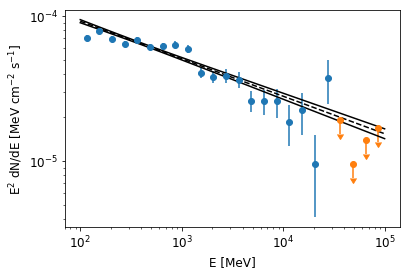

In [22]:
plt.loglog(E, (E**2)*dnde, 'k--')
plt.loglog(E, (E**2)*dnde_hi, 'k')
plt.loglog(E, (E**2)*dnde_lo, 'k')
plt.errorbar(sed['e_ctr'][:-4],
             sed['e2dnde'][:-4], 
             yerr=sed['e2dnde_err'][:-4], fmt ='o')
plt.errorbar(np.array(sed['e_ctr'][-4:]),
         sed['e2dnde_ul95'][-4:], yerr=0.2*sed['e2dnde_ul95'][-4:], 
             fmt='o', uplims=True)
plt.xlabel('E [MeV]')
plt.ylabel(r'E$^{2}$ dN/dE [MeV cm$^{-2}$ s$^{-1}$]')
plt.show()

## Likelihood ratio test

In [23]:
TS = -2*(fit2['loglike'] - fit['loglike'])

In [24]:
TS

25.68378016387578

Is this significant?